## Intro

This is inspired by 
Article (likas2001probability) Likas, A. Probability density estimation using artificial neural networks Computer physics communications, Elsevier, 2001, 135, 167-175

But rather than estimating the working with a network, we will instead work with its derivitive.
This will let us replace their integration with a derivative.

Note that this method only works for compact supports



They use the PDF is given by $$p_h(x,p) = \dfrac{h(x,p)}{\int_S h(z,p) dz}$$
and in their case $h=N(x,p)$  a neural network with weight and bias parameters $p$.
Where $S$ is a compact support. (That means bounded)


But if instead we say $h=\frac{\partial N(x,p)}{\partial x}$,

then $$p_h(x,p) = \dfrac{h(x,p)}{\int_S h(z,p)}=\dfrac{\frac{\partial N(x,p)}{\partial x}}{N(max(S),p) - N(min(S), p)}$$

The denominator is of-course more complex for non-1D values of S.


The loss function given is the negative log-likelihood of the set of training samples $X$
$$L(p) = -\sum_{\forall x \in X} ln(h(x,p))  + |X| ln(\int_S h(z,p) dx)$$

Which befomes:

$$L(p) = -\sum_{\forall x \in X} log(\frac{\partial N(x,p)}{\partial x})  + |X|(ln(N(max(S),p)-N(min(S),p)) dx$$

In [1]:
using DensityEstimationML
function only(itr)
    state = start(itr)
    val,state = next(itr, state)
    @assert(done(itr,state))
    return val
end

only (generic function with 1 method)

In [2]:
using TensorFlow
using Distributions
using StatsBase
using StaticArrays

In [3]:
using Plots
using IJulia

"""
Function returning a function that will display a running plot.
WARNING: Introducting or removing any variables is not supported.
And will silently error.
"""
function running_plot()
    epochs = Int[]
    record = Dict()
    function inner(epoch, vars::Associative)
        for (var, values) in vars
            value = only(values) #Incase it was an array
            past = get!(record, var) do
                typeof(value)[]
            end
            push!(past, value)
        end
        push!(epochs, epoch)
        
        IJulia.clear_output(true)
        plot(epochs, hcat(values(record)...); label=hcat(keys(vars)...), layout=length(vars)) |> IJulia.display       
    end
end


running_plot

In [4]:
function demonstration_plot(est, dataset, data, args...; kwargs...)
    X = minimum(approximate_support(dataset)) : 0.01 : maximum(approximate_support(dataset)) |> collect
    println("True loglikelihood      = $(loglikelihood(dataset, data))")
    println("Estimated loglikelihood = $(loglikelihood(est, data))")
    plot([X], [pdf(est,X), data],
        #xlims= approximate_support(dataset),
        xlims= (first(X), last(X)),
        seriestype = [:path :histogram],
        layout=(2,1),
        legend=false,
        nbins=[1  length(data)÷10],
        args...; kwargs...
    )
end

demonstration_plot (generic function with 1 method)

In [5]:
function demo(dataset, layers, epochs=20_000; max_conditioning_epochs=2000)
    data = original_sample(dataset)
    @show loglikelihood(dataset, data)
    est = NeuralDensityEstimator(layers, approximate_support(dataset))

    condition!(est; max_epochs = max_conditioning_epochs)
    println("Conditioning Done")
    Plots.gr()
    fit!(est, data; epochs=epochs, callback=running_plot())
    println("Fitting Done")
    pyplot()
    
    demonstration_plot(est, dataset, data) |> IJulia.display
    
    est    
end

demo (generic function with 2 methods)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2500 
 
 
 5000 
 
 
 7500 
 
 
 2.5 
 
 
 5.0 
 
 
 7.5 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 55.6177,175.813 57.9223,36.0019 60.2269,11.811 62.5315,30.1126 64.8362,42.1417 67.1408,57.6317 69.4454,74.9049 71.75,87.4311 74.0547,95.2738 76.3593,102.45 
 78.6639,103.348 80.9686,91.4136 83.2732,65.3505 85.5778,34.2991 87.8824,22.1332 90.1871,29.1237 92.4917,38.3778 94.7963,44.4891 97.1009,49.5753 99.4056,57.9571 
 101.71,67.0802 104.015,72.3958 106.319,72.8572 108.624,71.728 110.929,70.4906 113.233,69.4598 115.538,68.7112 117.843,68.2245 120.147,67.9603 122.452,67.8841 
 124.756,67.9688 127.061,68.1931 129.366,68.5404 131.67,68.994 133.975,69.5369 136.28,70.1367 138.584,70.7441 140.889,71.2975 143.193,71.5124 145.498,70.8026 
 147.803,69.5999 150.107,68.2633 152.412,67.029 154.717,66.0419 157.021,65.2309 159.326,64.5717 161.63,64.1203 163.935,63.8515 166.24,63.8604 168.544,65.0844 
 170.849,76.7441 173.154,82.3738 175.458,85.2989 177.763,87.1806 180.068,88.5726 182.372,89.7079 184.677,90.7073 186.981,91.628 189.286,92.5066 191.591,93.3657 
 193.895,94.2296 196.2,95.1251 198.505,96.013 200.809,96.9233 203.114,97.8667 205.418,98.8308 207.723,99.762 210.028,100.68 212.332,101.574 214.637,102.412 
 216.942,103.189 219.246,103.953 221.551,104.647 223.855,105.233 226.16,105.682 228.465,106.001 230.769,106.145 233.074,106.127 235.379,106.045 237.683,105.874 
 239.988,105.628 242.292,105.476 244.597,105.442 246.902,105.526 249.206,105.74 251.511,106.051 253.816,106.452 256.12,106.924 258.425,107.436 260.729,107.987 
 263.034,108.59 265.339,109.22 267.643,109.917 269.948,110.616 272.253,111.318 274.557,112.019 276.862,112.696 279.166,113.391 281.471,114.045 283.776,114.648 
 
 "/>
 
 
 
 
 ysmax 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2500 
 
 
 5000 
 
 
 7500 
 
 
 20000 
 
 
 30000 
 
<polyline clip-path="url(#clip03)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 352.157,11.811 354.462,113.227 356.766,135.167 359.071,138.52 361.375,139.264 363.68,139.672 365.985,140.12 368.289,140.686 370.594,141.442 372.899,142.981 
 375.203,145.308 377.508,147.863 379.812,150.096 382.117,151.908 384.422,154.723 386.726,157.316 389.031,159.43 391.336,161.232 393.64,162.858 395.945,164.47 
 398.249,166.211 400.554,168.38 402.859,169.881 405.163,170.624 407.468,171.101 409.773,171.419 412.077,171.634 414.382,171.781 416.686,171.883 418.991,171.956 
 421.296,172.009 423.6,172.05 425.905,172.084 428.21,172.113 430.514,172.138 432.819,172.162 435.123,172.184 437.428,172.205 439.733,172.23 442.037,172.317 
 444.342,172.65 446.647,173.112 448.951,173.507 451.256,173.715 453.56,173.821 455.865,173.898 458.17,173.964 460.474,174.022 462.779,174.079 465.084,174.219 
 467.388,174.478 469.693,174.595 471.998,174.67 474.302,174.729 476.607,174.781 478.911,174.828 481.216,174.873 483.521,174.915 485.825,174.956 488.13,174.995 
 490.435,175.032 492.739,175.067 495.044,175.1 497.348,175.131 499.653,175.16 501.958,175.188 504.262,175.214 506.567,175.238 508.872,175.261 511.176,175.284 
 513.481,175.305 515.785,175.327 518.09,175.348 520.395,175.37 522.699,175.391 525.004,175.413 527.309,175.434 529.613,175.455 531.918,175.476 534.222,175.496 
 536.527,175.516 538.832,175.535 541.136,175.554 543.441,175.573 545.746,175.59 548.05,175.607 550.355,175.624 552.659,175.64 554.964,175.656 557.269,175.672 
 559.573,175.687 561.878,175.702 564.183,175.716 566.487,175.73 568.792,175.744 571.096,175.758 573.401,175.772 575.706,175.785 578.01,175.799 580.315,175.813 
 
 "/>
 
 
 
 
 working_loss 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2500 
 
 
 5000 
 
 
 7500 
 
 
 -30000 
 
 
 -20000 
 
<polyline clip-path="url(#clip04)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 55.6177,375.813 57.9223,274.386 60.2269,252.446 62.5315,249.1 6

Fitting Done
True loglikelihood      = -10460.417741142115



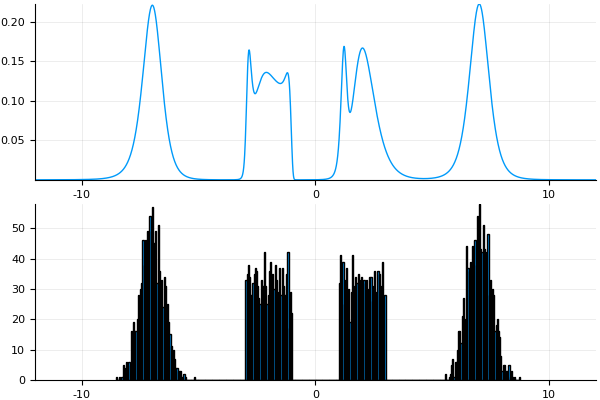

Estimated loglikelihood = -10749.983591579816


DensityEstimationML.NeuralDensityEstimator{1}(Session(Ptr{Void} @0x00007fd84c8535b0), <Tensor Group:1 shape=unknown dtype=Complex{Float64}>, <Tensor Group_2:1 shape=unknown dtype=Any>, <Tensor t:1 shape=(1, ?) dtype=Float32>, <Tensor pdf:1 shape=unknown dtype=Float64>)

In [13]:
est=demo(GenerateDatasets.Likas1(), [64, 64, 256], 10_000)

In [14]:
# serious levels of sparsity only a few components matter at all
sort(component_weights(est))

256-element Array{Float32,1}:
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 ⋮         
 0.00465561
 0.00490478
 0.0061383 
 0.00745164
 0.00871045
 0.014302  
 0.0214234 
 0.0640988 
 0.21974   
 0.390394  
 0.620357  
 4.23067   

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::Array{Float32,1}) at ./deprecated.jl:57
 [3] |>(::Array{Float32,1}, ::Base.#abs) at ./operators.jl:862
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /home/uniwa/students2/students/20361362/linux/.julia/v0.6/Compat/src/Compat.jl:407
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/uniwa/students2/students/20361362/linux/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /home/uniwa/students2/students/20361362/linux/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[15], in expression starting on line 1



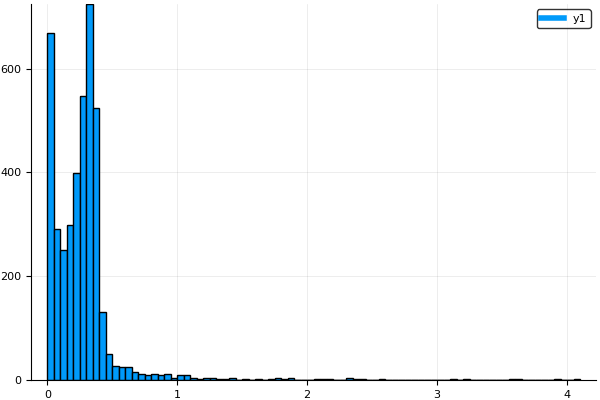

In [15]:
# check that sparsity
run(est.sess, est.sess.graph["W_3"]) |> vec |> abs |> histogram

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5000 
 
 
 10000 
 
 
 15000 
 
 
 10 
 
 
 20 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 55.6177,175.813 56.7642,158.02 57.9107,98.9957 59.0572,18.601 60.2038,11.811 61.3503,26.4063 62.4968,36.0311 63.6433,41.5054 64.7898,44.6288 65.9364,46.405 
 67.0829,48.3374 68.2294,50.8328 69.3759,53.8728 70.5225,57.2002 71.669,60.4755 72.8155,63.4844 73.962,66.1998 75.1085,68.7129 76.2551,71.1554 77.4016,73.6598 
 78.5481,76.3447 79.6946,79.3019 80.8412,82.52 81.9877,85.8124 83.1342,88.9435 84.2807,91.7851 85.4273,94.3434 86.5738,96.6414 87.7203,98.7154 88.8668,100.656 
 90.0133,102.583 91.1599,104.589 92.3064,106.661 93.4529,108.735 94.5994,110.743 95.746,112.642 96.8925,114.41 98.039,116.037 99.1855,117.596 100.332,119.215 
 101.479,120.881 102.625,122.512 103.772,124.067 104.918,125.52 106.065,126.877 107.211,128.145 108.358,129.322 109.504,130.459 110.651,131.538 111.797,132.585 
 112.944,133.602 114.09,134.584 115.237,135.539 116.383,136.448 117.53,137.281 118.676,137.984 119.823,138.571 120.969,139.155 122.116,139.829 123.263,140.595 
 124.409,141.413 125.556,142.236 126.702,143.02 127.849,143.707 128.995,143.665 130.142,143.605 131.288,144.124 132.435,144.743 133.581,145.399 134.728,146.066 
 135.874,146.76 137.021,147.492 138.167,148.259 139.314,148.948 140.46,149.434 141.607,149.867 142.753,150.327 143.9,150.752 145.046,151.1 146.193,151.436 
 147.339,151.844 148.486,152.353 149.633,152.93 150.779,153.545 151.926,154.179 153.072,154.82 154.219,155.453 155.365,156.065 156.512,156.645 157.658,157.186 
 158.805,157.689 159.951,158.158 161.098,158.606 162.244,159.03 163.391,159.442 164.537,159.847 165.684,160.239 166.83,160.622 167.977,160.99 169.123,161.345 
 170.27,161.685 171.416,162.006 172.563,162.31 173.71,162.595 174.856,162.87 176.003,163.125 177.149,163.371 178.296,163.599 179.442,163.818 180.589,164.028 
 181.735,164.234 182.882,164.428 184.028,164.618 185.175,164.801 186.321,164.977 187.468,165.15 188.614,165.319 189.761,165.485 190.907,165.645 192.054,165.801 
 193.2,165.954 194.347,166.107 195.493,166.254 196.64,166.4 197.786,166.544 198.933,166.702 200.08,166.886 201.226,167.056 202.373,167.21 203.519,167.342 
 204.666,167.465 205.812,167.579 206.959,167.685 208.105,167.788 209.252,167.877 210.398,167.962 211.545,168.033 212.691,168.093 213.838,168.134 214.984,168.158 
 216.131,168.161 217.277,168.146 218.424,168.11 219.57,168.053 220.717,168.043 221.863,167.936 223.01,165.11 224.157,165.123 225.303,165.498 226.45,165.874 
 227.596,166.249 228.743,166.557 229.889,166.809 231.036,166.991 232.182,167.075 233.329,167.051 234.475,166.928 235.622,166.73 236.768,166.458 237.915,166.127 
 239.061,165.747 240.208,165.325 241.354,164.866 242.501,164.381 243.647,163.853 244.794,163.308 245.94,162.734 247.087,162.117 248.233,161.459 249.38,160.779 
 250.527,160.054 251.673,159.295 252.82,158.503 253.966,157.675 255.113,156.833 256.259,155.959 257.406,155.05 258.552,154.112 259.699,153.134 260.845,152.14 
 261.992,151.09 263.138,150.015 264.285,148.9 265.431,147.743 266.578,146.557 267.724,145.36 268.871,144.119 270.017,142.829 271.164,141.486 272.31,140.158 
 273.457,138.778 274.604,137.359 275.75,135.917 276.897,134.451 278.043,132.937 279.19,131.432 280.336,129.913 281.483,128.353 282.629,126.775 283.776,125.167 
 
 "/>
 
 
 
 
 ysmax 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5000 
 
 
 10000 
 
 
 15000 
 
 
 10000 
 
 
 15000 
 
 
 20000 
 
<polyline clip-path="url(#clip03)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 352.157,11.811 353.303,111.626 354.45,149.478 355.596,158.742 356.743,161.422 357.89,162.934 359.036,163.933 360.183,164.673 361.329,165.343 362.476,165.956 
 363.622,166.513 364.769,167.024 365.915,167.499 367.062,167.944 368.208,168.366 369.355,168.765 370.501,169.143 371.648,169.5 372.794,169.836 37

Fitting Done
True loglikelihood      = -7128.92733457648



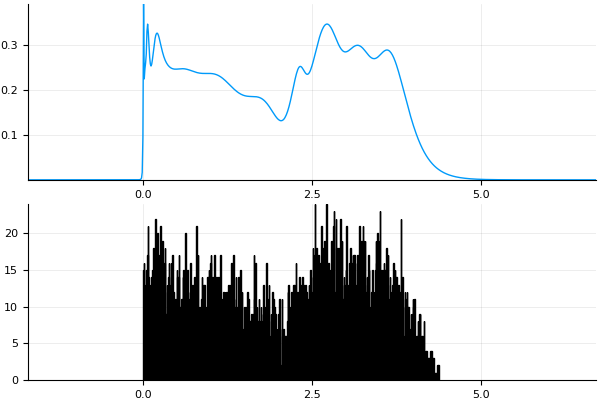

Estimated loglikelihood = -7145.545686143989


DensityEstimationML.NeuralDensityEstimator{1}(Session(Ptr{Void} @0x00007fd84c460e90), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor Group_2:1 shape=unknown dtype=Any>, <Tensor t:1 shape=(1, ?) dtype=Float32>, <Tensor pdf:1 shape=unknown dtype=Float64>)

In [16]:
demo(GenerateDatasets.Likas2(), [64,64], 20_000)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2500 
 
 
 5000 
 
 
 7500 
 
 
 1.5 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 42.4384,11.811 44.8595,141.942 47.2806,160.575 49.7017,165.211 52.1228,165.432 54.544,159.046 56.9651,136.174 59.3862,95.6025 61.8073,54.4866 64.2284,29.3565 
 66.6495,19.7531 69.0706,19.7417 71.4917,25.563 73.9128,35.2789 76.3339,47.6984 78.7551,61.909 81.1762,77.1225 83.5973,92.6323 86.0184,107.807 88.4395,122.1 
 90.8606,135.055 93.2817,146.325 95.7028,155.674 98.1239,162.995 100.545,168.334 102.966,171.568 105.387,172.989 107.808,173.781 110.229,174.295 112.651,174.641 
 115.072,174.877 117.493,175.029 119.914,175.167 122.335,175.25 124.756,175.336 127.177,175.389 129.598,175.446 132.019,175.482 134.441,175.523 136.862,175.548 
 139.283,175.579 141.704,175.597 144.125,175.621 146.546,175.634 148.967,175.652 151.388,175.661 153.809,175.676 156.231,175.687 158.652,175.697 161.073,175.709 
 163.494,175.714 165.915,175.724 168.336,175.728 170.757,175.737 173.178,175.741 175.599,175.749 178.021,175.751 180.442,175.758 182.863,175.758 185.284,175.764 
 187.705,175.771 190.126,175.771 192.547,175.776 194.968,175.775 197.389,175.779 199.811,175.784 202.232,175.783 204.653,175.787 207.074,175.791 209.495,175.79 
 211.916,175.794 214.337,175.794 216.758,175.796 219.179,175.8 221.601,175.798 224.022,175.802 226.443,175.801 228.864,175.803 231.285,175.806 233.706,175.803 
 236.127,175.806 238.548,175.809 240.969,175.807 243.391,175.81 245.812,175.807 248.233,175.809 250.654,175.812 253.075,175.807 255.496,175.809 257.917,175.811 
 260.338,175.812 262.759,175.811 265.181,175.813 267.602,175.809 270.023,175.811 272.444,175.813 274.865,175.811 277.286,175.811 279.707,175.813 282.128,175.811 
 
 "/>
 
 
 
 
 ysmax 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2500 
 
 
 5000 
 
 
 7500 
 
 
 825 
 
 
 850 
 
 
 875 
 
<polyline clip-path="url(#clip03)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 340.625,11.811 343.046,32.0806 345.467,33.2096 347.888,33.4347 350.31,33.725 352.731,41.424 355.152,52.2245 357.573,60.9785 359.994,67.9877 362.415,73.7318 
 364.836,78.622 367.257,82.8786 369.678,86.6313 372.099,89.9698 374.521,92.9635 376.942,95.6672 379.363,98.1264 381.784,100.38 384.205,102.458 386.626,104.389 
 389.047,106.194 391.468,107.89 393.889,109.491 396.311,111.007 398.732,112.446 401.153,113.814 403.574,115.12 405.995,116.384 408.416,117.619 410.837,118.834 
 413.258,120.037 415.679,121.229 418.101,122.413 420.522,123.59 422.943,124.759 425.364,125.92 427.785,127.072 430.206,128.213 432.627,129.343 435.048,130.461 
 437.469,131.568 439.891,132.661 442.312,133.741 444.733,134.808 447.154,135.861 449.575,136.9 451.996,137.925 454.417,138.935 456.838,139.934 459.259,140.915 
 461.681,141.886 464.102,142.841 466.523,143.783 468.944,144.711 471.365,145.626 473.786,146.528 476.207,147.417 478.628,148.292 481.049,149.155 483.471,150.005 
 485.892,150.844 488.313,151.67 490.734,152.484 493.155,153.287 495.576,154.078 497.997,154.857 500.418,155.626 502.839,156.384 505.261,157.131 507.682,157.868 
 510.103,158.594 512.524,159.306 514.945,160.016 517.366,160.712 519.787,161.399 522.208,162.076 524.629,162.741 527.051,163.402 529.472,164.052 531.893,164.693 
 534.314,165.324 536.735,165.946 539.156,166.563 541.577,167.169 543.998,167.767 546.419,168.357 548.841,168.939 551.262,169.513 553.683,170.079 556.104,170.637 
 558.525,171.179 560.946,171.732 563.367,172.267 565.788,172.795 568.209,173.316 570.631,173.83 573.052,174.336 575.473,174.836 577.894,175.329 580.315,175.813 
 
 "/>
 
 
 
 
 working_loss 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2500 
 
 
 5000 
 
 
 7500 
 
 
 -875 
 
 
 -850 
 
 
 -825 
 
<polyline clip-path="url(#clip04)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 42.4384,375.813 44.8595,355.454 47.2806,354.

Fitting Done
True loglikelihood      = -789.8449596782973



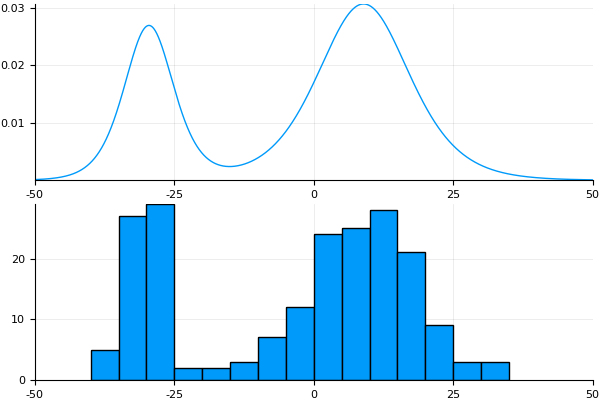

Estimated loglikelihood = -800.5568562850015


DensityEstimationML.NeuralDensityEstimator{1}(Session(Ptr{Void} @0x00007fd84cae2970), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor Group_2:1 shape=unknown dtype=Any>, <Tensor t:1 shape=(1, ?) dtype=Float32>, <Tensor pdf:1 shape=unknown dtype=Float64>)

In [10]:
demo(GenerateDatasets.MagdonIsmailAndAtiya(), [32], 10_000)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5000 
 
 
 10000 
 
 
 15000 
 
 
 5 
 
 
 10 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 49.028,175.813 50.2077,159.298 51.3873,156.866 52.5669,156.996 53.7466,155.556 54.9262,152.513 56.1059,146.887 57.2855,136.437 58.4651,116.272 59.6448,80.4274 
 60.8244,47.2085 62.004,38.7205 63.1837,38.23 64.3633,38.9872 65.5429,38.9397 66.7226,33.702 67.9022,22.4275 69.0819,16.4021 70.2615,13.2396 71.4411,11.811 
 72.6208,12.0378 73.8004,13.4789 74.98,15.5941 76.1597,17.85 77.3393,19.2824 78.5189,21.1338 79.6986,23.9263 80.8782,26.86 82.0579,30.1623 83.2375,33.7294 
 84.4171,36.4287 85.5968,39.0798 86.7764,42.7622 87.956,46.9123 89.1357,50.5035 90.3153,53.6082 91.4949,56.6846 92.6746,59.8133 93.8542,62.8283 95.0339,65.6914 
 96.2135,68.429 97.3931,71.0459 98.5728,73.5427 99.7524,75.9212 100.932,78.1793 102.112,80.3108 103.291,82.3045 104.471,84.1517 105.651,85.8421 106.83,87.376 
 108.01,88.762 109.189,90.0137 110.369,91.1413 111.549,92.153 112.728,93.0519 113.908,93.8254 115.088,94.4251 116.267,95.1291 117.447,95.8733 118.627,96.6254 
 119.806,97.6752 120.986,98.8778 122.165,100.129 123.345,101.405 124.525,102.679 125.704,103.964 126.884,105.255 128.064,106.547 129.243,107.831 130.423,109.109 
 131.603,110.374 132.782,111.624 133.962,112.836 135.141,114.022 136.321,115.17 137.501,116.286 138.68,117.363 139.86,118.39 141.04,119.382 142.219,120.326 
 143.399,121.232 144.579,122.099 145.758,122.888 146.938,123.638 148.118,124.355 149.297,125.048 150.477,125.719 151.656,126.379 152.836,127.016 154.016,127.617 
 155.195,128.195 156.375,128.736 157.555,129.252 158.734,129.721 159.914,130.147 161.094,130.531 162.273,130.87 163.453,131.155 164.632,131.405 165.812,131.615 
 166.992,131.252 168.171,131.23 169.351,131.403 170.531,131.638 171.71,131.972 172.89,132.393 174.07,132.85 175.249,133.3 176.429,133.725 177.608,134.126 
 178.788,134.488 179.968,134.816 181.147,135.112 182.327,135.384 183.507,135.644 184.686,135.896 185.866,136.131 187.046,136.364 188.225,136.586 189.405,136.815 
 190.584,137.04 191.764,137.265 192.944,137.493 194.123,137.722 195.303,137.959 196.483,138.191 197.662,138.429 198.842,138.661 200.022,138.905 201.201,139.144 
 202.381,139.381 203.56,139.625 204.74,139.87 205.92,140.113 207.099,140.366 208.279,140.605 209.459,140.872 210.638,141.129 211.818,141.403 212.998,141.675 
 214.177,141.965 215.357,142.252 216.536,142.563 217.716,142.845 218.896,143.166 220.075,143.459 221.255,143.757 222.435,144.058 223.614,144.337 224.794,144.631 
 225.974,144.93 227.153,145.261 228.333,145.599 229.512,145.964 230.692,146.345 231.872,146.74 233.051,147.152 234.231,147.564 235.411,147.984 236.59,148.401 
 237.77,148.815 238.95,149.223 240.129,149.626 241.309,150.019 242.488,150.41 243.668,150.793 244.848,151.154 246.027,151.508 247.207,151.858 248.387,152.192 
 249.566,152.508 250.746,152.815 251.926,153.12 253.105,153.414 254.285,153.697 255.464,153.971 256.644,154.233 257.824,154.493 259.003,154.728 260.183,154.971 
 261.363,155.195 262.542,155.42 263.722,155.639 264.902,155.85 266.081,156.054 267.261,156.25 268.44,156.445 269.62,156.626 270.8,156.806 271.979,156.979 
 273.159,157.148 274.339,157.309 275.518,157.468 276.698,157.624 277.878,157.777 279.057,157.928 280.237,158.071 281.416,158.208 282.596,158.344 283.776,158.475 
 
 "/>
 
 
 
 
 ysmax 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5000 
 
 
 10000 
 
 
 15000 
 
 
 5000 
 
 
 6000 
 
 
 7000 
 
<polyline clip-path="url(#clip03)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 345.567,11.811 346.747,72.0074 347.927,76.9869 349.106,77.634 350.286,78.3931 351.465,79.2907 352.645,80.3434 353.825,81.5698 355.004,82.9764 356.184,84.4694 
 357.364,85.7743 358.543,86.8921 359.723,87.9048 360.903,88.85 362.082,89.8462 363.262,91.2826 364.441,93.208 365.621,95.0991 366.801,97.0079 3

Fitting Done
True loglikelihood      = -4308.792670836306



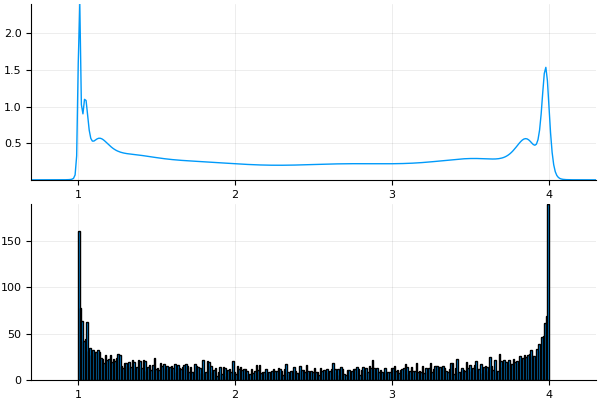

Estimated loglikelihood = -4717.131383487122


DensityEstimationML.NeuralDensityEstimator{1}(Session(Ptr{Void} @0x00007fd84c3fb1f0), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor Group_2:1 shape=unknown dtype=Any>, <Tensor t:1 shape=(1, ?) dtype=Float32>, <Tensor pdf:1 shape=unknown dtype=Float64>)

In [11]:
demo(Arcsine(1,4), [64,64], 20_000)

## WIP >1D

In [12]:
dataset = GenerateDatasets.Likas3()
data = original_sample(dataset)
est = NeuralDensityEstimator([64], approximate_support(GenerateDatasets.Likas3()))

2017-09-22 20:10:33.089528: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1030] Creating TensorFlow device (/gpu:0) -> (device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:01:00.0)


pdf = <Tensor pdf:1 shape=unknown dtype=Float64>


DensityEstimationML.NeuralDensityEstimator{2}(Session(Ptr{Void} @0x00007fd84d33df30), <Tensor Group:1 shape=unknown dtype=Float32>, <Tensor Group_2:1 shape=unknown dtype=Any>, <Tensor t:1 shape=(2, ?) dtype=Float32>, <Tensor pdf:1 shape=unknown dtype=Float64>)

In [ ]:
@show loglikelihood(dataset, data)

In [ ]:
est = NeuralDensityEstimator([64], approximate_support(GenerateDatasets.Likas3()))

In [ ]:
condition!(est)

In [ ]:

fit!(est, data'; epochs=10_000, callback=running_plot())

In [ ]:

fit!(est, data; epochs=10_000, callback=running_plot())
println("Fitting Done")

In [ ]:
sess = est.sess
run(sess, est.pdf, Dict(est.t=>[0.1 0.1; 0.1 0.1; 0.3 0.6]'))

In [ ]:
sess = est.sess
run(sess, sess.graph["numerator"], Dict(est.t=>[0.1 0.1; 0.1 0.1; 0.3 0.6]'))

In [ ]:
data

In [ ]:
run(sess, gather(constant(data), 1))

In [ ]:
plotly()

In [ ]:
"""
    meshgrid(xs, ys, zfun)

Evalates `zfun(x,y)` at each point in `xs`, and `ys`.
Returns 3 vectors, a list of x points a list of y points and the value of z at that point.
"""
function meshgrid(xs, ys, zfun) 
    # There is a cute generalisation of this with a `@generated` function
    xpoints = eltype(xs)[]
    ypoints = eltype(ys)[]
    zpoints = typeof(zfun(xs[1],ys[1]))[]
    sizehint!.([xpoints, ypoints, zpoints], length(xs)*length(ys))
    for x in xs, y in ys
        push!(xpoints,x)
        push!(ypoints,y)
        push!(zpoints,zfun(x,y))
    end
    
    xpoints, ypoints, zpoints
end


In [ ]:
X=-0.1:0.01:0.3
Y=-0.1:0.01:0.3
scatter3d(meshgrid(X,Y, (x,y)->pdf(est, [x,y]))...)

In [ ]:
pdf(est, SMatrix{1,2}([0.1 0.1]))

In [ ]:
est

In [ ]:
size([0.1 0.1])

In [ ]:
?SArray